___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [6]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [8]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

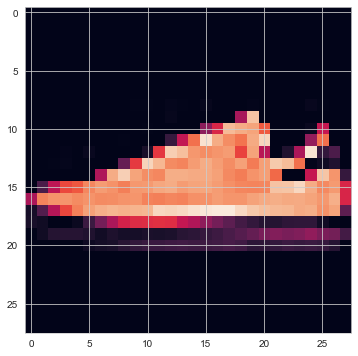

In [11]:
plt.imshow(X_train[6])
# plt.matshow(X_train[5])

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [9]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [12]:
y_train[0]

9

In [14]:
classes[int(y_train[0])]

'Ankle boot'

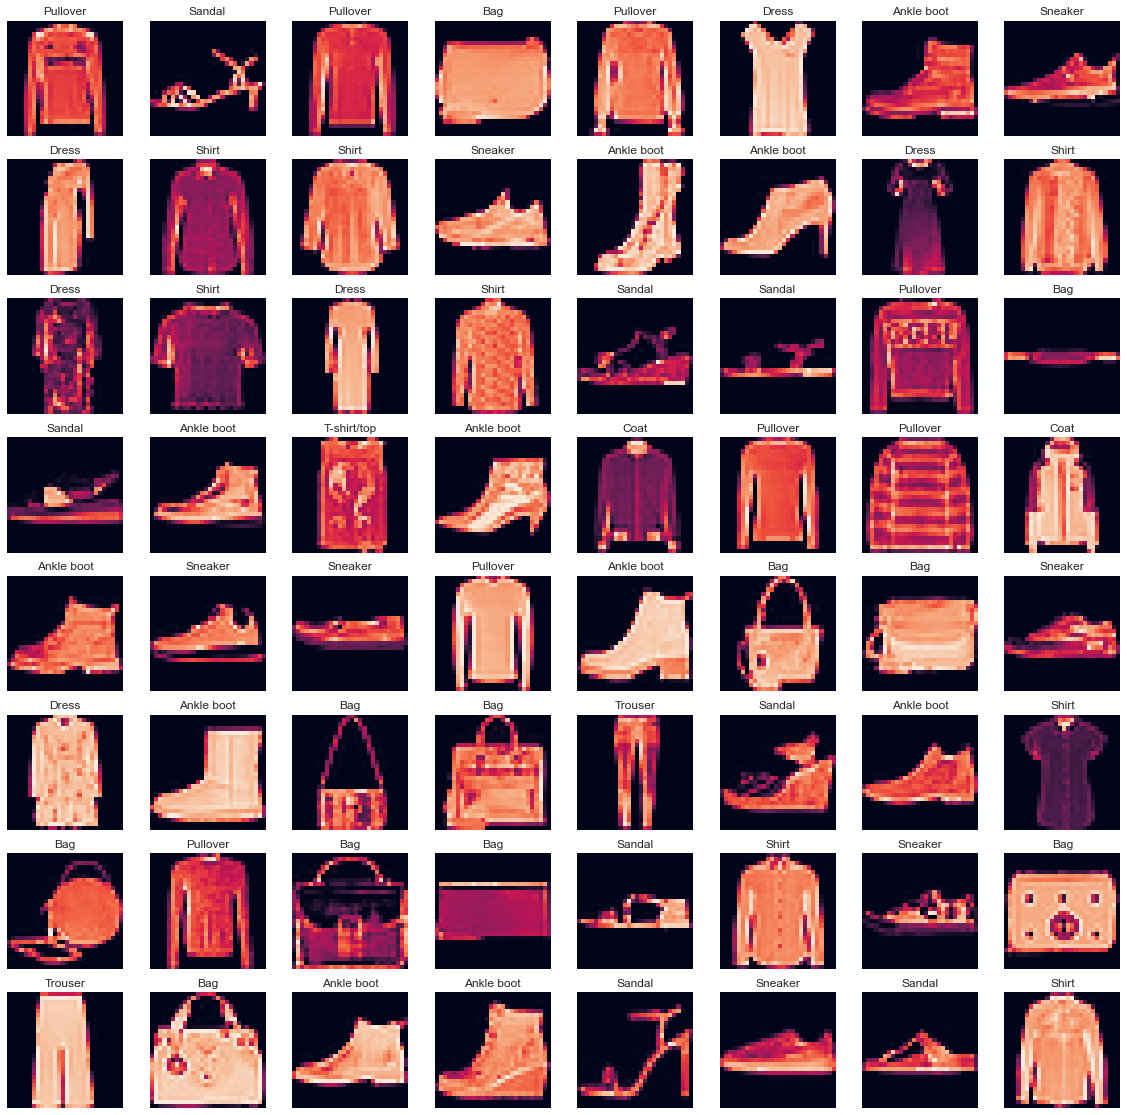

In [15]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [16]:
X_train[5].min()

0

In [17]:
X_train[5].max()

255

In [18]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [19]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [21]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [24]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [33]:
Y_test.shape

(10000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [64]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1568)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights = True)

In [68]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 44s 22ms/step - loss: 0.4381 - accuracy: 0.8405 - val_loss: 0.3383 - val_accuracy: 0.8789
Epoch 2/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2884 - accuracy: 0.8946 - val_loss: 0.2800 - val_accuracy: 0.8968
Epoch 3/50
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2408 - accuracy: 0.9112 - val_loss: 0.2806 - val_accuracy: 0.8939
Epoch 4/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2105 - accuracy: 0.9222 - val_loss: 0.2652 - val_accuracy: 0.9069
Epoch 5/50
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1846 - accuracy: 0.9310 - val_loss: 0.2425 - val_accuracy: 0.9163
Epoch 6/50
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1625 - accuracy: 0.9401 - val_loss: 0.2462 - val_accuracy: 0.9154
Epoch 7/50
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1464 - accuracy: 0.9456 - val_loss: 0.3016 -

In [73]:
model.metrics_names

['loss', 'accuracy']

In [74]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.438,0.841,0.338,0.879
1,0.288,0.895,0.280,0.897
2,0.241,0.911,0.281,0.894
3,0.210,0.922,0.265,0.907
4,0.185,0.931,0.242,0.916


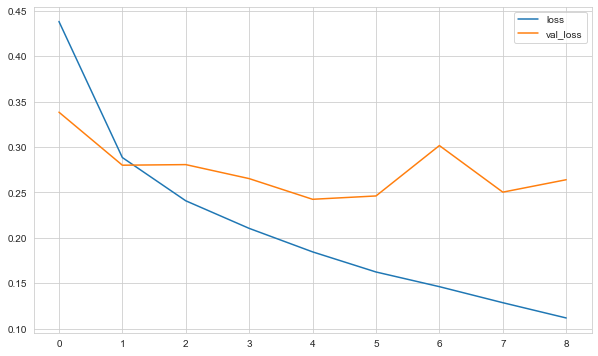

In [75]:
summary[["loss", "val_loss"]].plot();

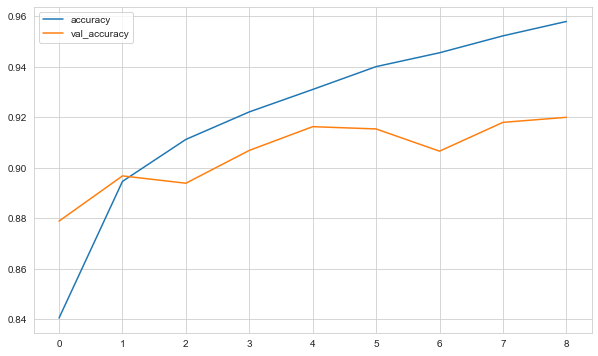

In [76]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2425 - accuracy: 0.9163


[0.2424953132867813, 0.9162999987602234]

In [79]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2424953132867813
Test accuracy: 0.9162999987602234


## Prediction

In [80]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 3s 7ms/step


In [81]:
y_pred = np.argmax(pred_prob, axis=1)

In [82]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.91      0.83      0.87      1000
           3       0.92      0.91      0.92      1000
           4       0.86      0.87      0.87      1000
           5       0.98      0.99      0.99      1000
           6       0.74      0.78      0.76      1000
           7       0.96      0.97      0.97      1000
           8       0.97      0.99      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [84]:
print(confusion_matrix(y_test, y_pred))

[[870   0  11  11   3   3  95   0   7   0]
 [  0 985   0   9   2   0   1   0   3   0]
 [ 16   2 831   8  69   0  70   0   4   0]
 [ 12   4   9 911  20   0  38   0   6   0]
 [  1   1  26  24 873   0  72   0   3   0]
 [  0   0   0   0   0 990   0   7   0   3]
 [104   2  35  21  49   0 779   0  10   0]
 [  0   0   0   0   0   6   0 972   0  22]
 [  2   0   0   1   0   2   1   4 990   0]
 [  0   0   0   0   0   6   1  31   0 962]]


<AxesSubplot:>

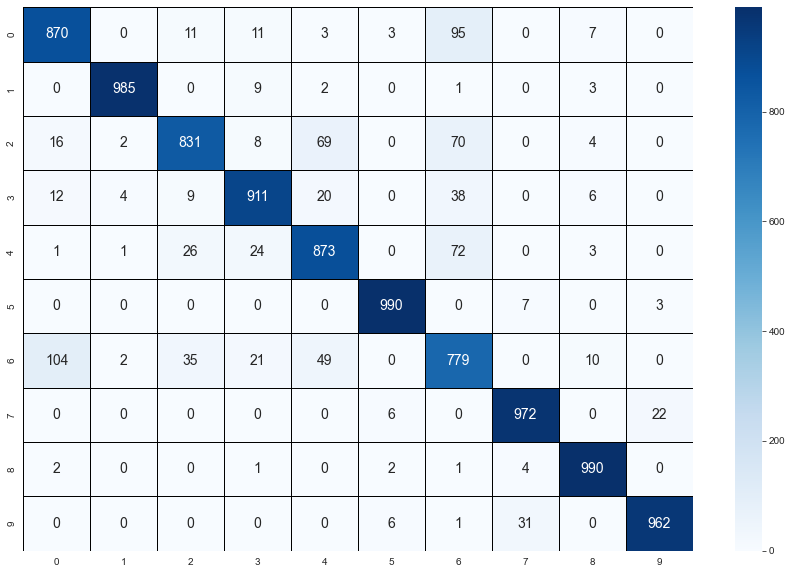

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [86]:
my_image = X_test[44]

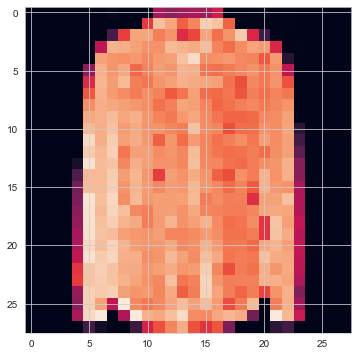

In [87]:
plt.imshow(my_image)

In [89]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

1/1 [==============================] - 0s 37ms/step


In [90]:
np.argmax(image_prediction, axis=1)

array([6], dtype=int64)

In [91]:
result=np.argmax(image_prediction, axis=1)

In [92]:
result

array([6], dtype=int64)

In [93]:
classes[int(result)]

'Shirt'

In [94]:
model.save("ass-2.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___